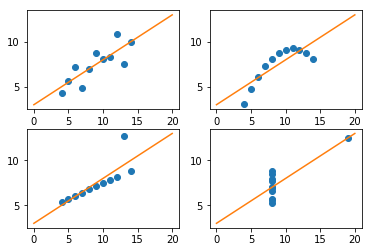

In [1]:
# Problem 1
import numpy as np
from matplotlib import pyplot as plt
anscombe = np.load('/Users/Sophia/Desktop/Bootcamp2017/Computation/Wk2_VisPandas/anscombe.npy')

x = np.linspace(0, 20, 100)
y = [0.5 * x1 + 3 for x1 in x]
plt.subplot(221)
plt.plot(anscombe[:, 0], anscombe[:, 1], 'o')
plt.plot(x, y)

plt.subplot(222)
plt.plot(anscombe[:, 2], anscombe[:, 3], 'o')
plt.plot(x, y)

plt.subplot(223)
plt.plot(anscombe[:, 4], anscombe[:, 5], 'o')
plt.plot(x, y)

plt.subplot(224)
plt.plot(anscombe[:, 6], anscombe[:, 7], 'o')
plt.plot(x, y)

plt.show()

The first plot shows a linear relationship between the two variabls;
The second plot shows a nonlinear relationship;
The third plot shows a linear relationship with one outlier, so the fitted line may be different;
The fourth plot shows that one outlier is powerful enough to generate an overall correlation even though all the other points are uncorrelated.

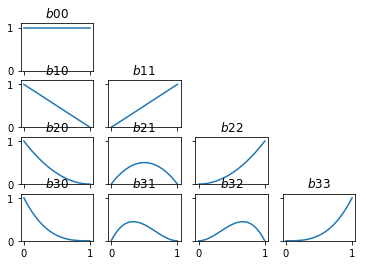

In [2]:
# Problem 2
import scipy
from scipy import special
x = np.linspace(0, 1, 100)
fig, axes = plt.subplots(4, 4)
fig.delaxes(axes[0,1]) 
fig.delaxes(axes[0,2])
fig.delaxes(axes[0,3])
fig.delaxes(axes[1,2])
fig.delaxes(axes[1,3])
fig.delaxes(axes[2,3])
for n in range(4):
    for v in range(0, n+1):
        b= [scipy.special.binom(n, v) * x1 ** v * (1 - x1) ** (n - v) for x1 in x]
        axes[n, v].plot(x, b)
        axes[n, v].set_ylim(0,1.1)
        axes[n, v].set_title(r"$b{}{}$".format(n, v))
        axes[n, v].tick_params(which="both", top="off", right="off")
        if n < 3: 
            axes[n ,v].tick_params(labelbottom="off")
        if v > 0: 
            axes[n, v].tick_params(labelleft="off")
plt.show()

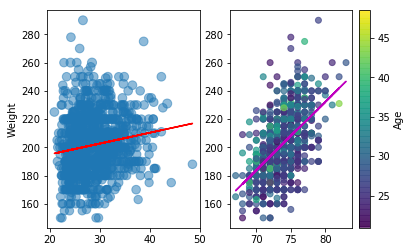

In [3]:
# Problem 3
from scipy import polyfit, polyval
MLB = np.load('/Users/Sophia/Desktop/Bootcamp2017/Computation/Wk2_VisPandas/MLB.npy')
plt.subplot(121)
plt.scatter(MLB[:,2], MLB[:,1], s = MLB[:, 0], alpha = 0.5)
(x, y) = polyfit(MLB[:,2], MLB[:,1], 1)
y_pre = polyval([x,y],MLB[:,2])
plt.plot(MLB[:,2], y_pre, 'r')
plt.ylabel("Weight")

plt.subplot(122)
plt.scatter(MLB[:,0], MLB[:,1], c = MLB[:,2], alpha = 0.7)
(a, b) = polyfit(MLB[:,0], MLB[:,1],1)
b_pre = polyval([a,b], MLB[:,0])
plt.plot(MLB[:,0], b_pre, 'm')
cbar = plt.colorbar()
cbar.set_label("Age")
plt.show()

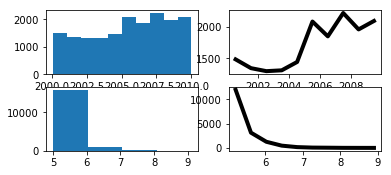

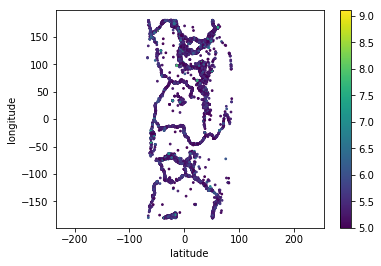

In [4]:
# Problem 4
year, magnitude, longitude, latitude = np.load('/Users/Sophia/Desktop/Bootcamp2017/Computation/Wk2_VisPandas/earthquakes.npy').T

plt.subplot(321)
plt.hist(year, bins=10)
plt.subplot(322)
freq, bin_edges = np.histogram(year, bins=10)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, freq, 'k-', lw=4)

plt.subplot(323)
plt.hist(magnitude, 4)
plt.subplot(324)
freq, bin_edges = np.histogram(magnitude, bins=10)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, freq, 'k-', lw=4)
plt.show()

plt.axis('equal')

plt.scatter(latitude, longitude, c=magnitude, s=3)
plt.axis('equal')
plt.xlabel('latitude')
plt.ylabel('longitude')
c = plt.colorbar()
c.set_label = ("magnitude")
plt.show()


As seen from the first row, more earthquakes happen in each year after 2005;
from the second row we know that stronger earthquakes happen very rarely compared to weaker ones; 
the last tells us where the earthquakes happen, and the colors of the dots represent the magnitude.

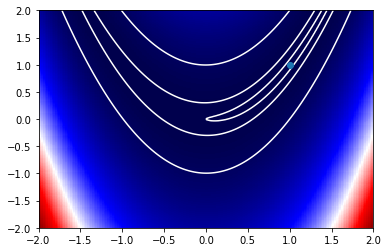

In [5]:
# Problem 5
x = np.linspace(-2,2,200)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = (1 - X) ** 2 + 100 * (Y - X ** 2) ** 2
plt.pcolormesh(X, Y, Z, cmap="seismic")
plt.contour(X, Y, Z, [1, 10, 100], colors="white")
plt.plot(1,1,'o')
plt.show()

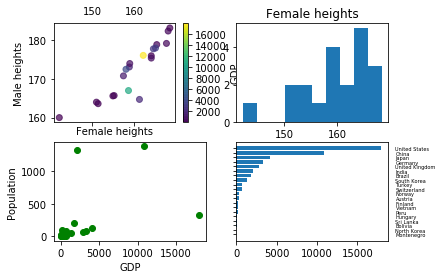

In [6]:
# Problem 6
c = np.load('/Users/Sophia/Desktop/Bootcamp2017/Computation/Wk2_VisPandas/countries.npy')

countries = ["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"]

plt.subplot(221)
plt.scatter(c[:,3],c[:,2], c = c[:,1], alpha = 0.7)
plt.xlabel('Female heights')
plt.ylabel('Male heights')
plt.colorbar().set_label('GDP')
plt.tick_params(axis='x', which='both', labelbottom='off', labeltop='on')

plt.subplot(222)
plt.hist(c[:,3])
plt.title('Female heights')

plt.subplot(223)
plt.scatter(c[:,1], c[:,0], c='g')
plt.xlabel('GDP')
plt.ylabel('Population')

plt.subplot(224)
gdp = c[:,1].tolist()
d = dict(zip(countries, gdp))
from operator import itemgetter
y = sorted(d.values())
x = sorted(d, key=d.get)
positions = np.arange(len(x))
plt.barh(positions, y)
plt.yticks(positions, x, fontsize =5)
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
plt.show()


Figure 1 is the scatterplot, showing a high--and close-to-linear--correlation between female heights and male height; figure 2 is a histogram, showing the distribution of female heights for all countris, indicating that most countries in the dataset has average female height above 160cm; figure 3 shows the relationship between GDP and populations--clearly there are three outliers that have extremely high population and/or GDP; figure 4 is the bar chart for GDP by country, with the highest GDP (US) on top and the lowest (Montenegro) at the bottom.